In [1]:
import palantir

# Plotting 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scanpy as sc
import numpy as np
import warnings
import anndata
import pandas as pd
import numpy as np
# Inline plotting
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['image.cmap'] = 'Spectral_r'
warnings.filterwarnings(action="ignore", module="matplotlib", message="findfont")

In [2]:
palantir.__version__

'1.3.1'

/tmp/ipykernel_15581/3130671839.py:2: DtypeWarning: Columns (84,102,105,112,113,114,115,117,119) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('meta_subset_duo_healthy_ileum_disease.csv')
/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


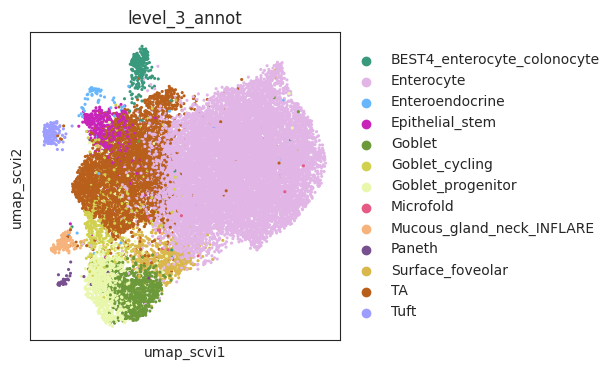

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


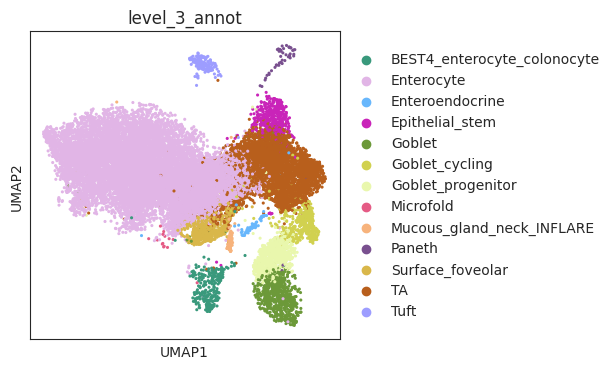

In [3]:
adata = anndata.read_h5ad('duo_healthy_ileum_disease.h5ad')
meta = pd.read_csv('meta_subset_duo_healthy_ileum_disease.csv')
adata.obs = meta.set_index('index')
sc.pl.embedding(adata , basis='umap_scvi', color='level_3_annot', s=20 )
sc.pl.embedding(adata , basis='umap', color='level_3_annot', s=20 )

adata.obs['clusters'] = adata.obs.level_3_annot 

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


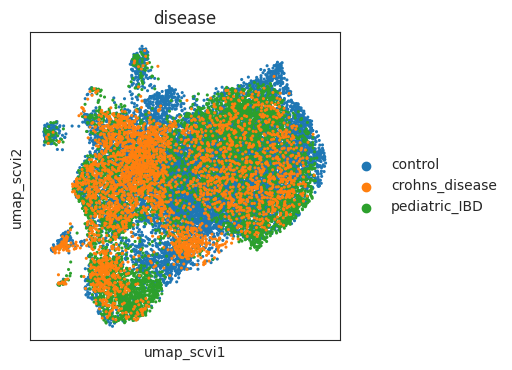

In [5]:
sc.pl.embedding(adata , basis='umap_scvi', color='disease', s=20 )

In [6]:
adata_original = adata.copy()

In [7]:
adata_original.X.data

array([ 2.,  1.,  2., ..., 64.,  6., 63.], dtype=float32)

In [8]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_per_cell(adata, 10000) 
sc.pp.log1p(adata)
sc.pp.pca(adata)

In [9]:
adata.X.data

array([2.6896715, 2.0622213, 2.6896715, ..., 5.8389807, 3.4996157,
       5.8232784], dtype=float32)

In [10]:
adata_original.X.data

array([ 2.,  1.,  2., ..., 64.,  6., 63.], dtype=float32)

In [11]:
sc.tl.score_genes(adata, gene_list=['LGR5', 'ASCL2', 'RGMB', 'OLFM4'] , score_name='start_score')

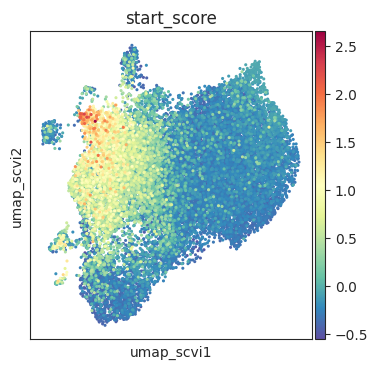

In [12]:
sc.pl.embedding(adata , basis='umap_scvi', color=['start_score'], s=20 )

In [13]:

start_cell_id = np.argmax(adata.obs.start_score)
start_cell =  adata.obs_names[start_cell_id] 
start_cell_id

10848

In [14]:
start_cell

'CGTTAGATCCTTTACA-HT-188-Adult-Duo-0'

In [15]:
adata[adata.obs_names == start_cell].obs.level_3_annot

index
CGTTAGATCCTTTACA-HT-188-Adult-Duo-0    Epithelial_stem
Name: level_3_annot, dtype: category
Categories (1, object): ['Epithelial_stem']

In [16]:
adata

AnnData object with n_obs × n_vars = 20765 × 23760
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [17]:
np.random.seed(5)
# Run diffusion maps
palantir.utils.run_diffusion_maps(adata, pca_key = 'X_scVI')
ms_data = palantir.utils.determine_multiscale_space(adata)
ms_data
#ms_data.index = adata.obs_names

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,0,1,2,3,4
index,,,,,
ACTGCTCAGTCCAGGA-HCA_A_GT12934998-0,0.267011,-0.018280,0.022852,-0.247814,0.082607
CGAGCCACAGTCTTCC-HCA_A_GT12934998-0,0.287858,-0.005539,0.027898,-0.308575,0.082181
AACACGTCAAGTCTAC-Pan_T7917827-0,-0.146574,-0.005716,0.026232,-0.011305,0.011964
AACTCAGTCTGTGCAA-Pan_T7917827-0,0.005171,-0.001407,0.022946,-0.070237,0.030112
AACTCTTCAGGAATCG-Pan_T7917827-0,-0.218892,-0.013108,0.034747,0.078926,-0.023220
...,...,...,...,...,...
GCTGGGTTCAAAGTAG-GSM3972030-1,0.083098,0.018329,0.012188,-0.141119,0.045870
GTATCTTAGCCAGGAT-GSM3972030-1,-0.206085,0.002092,0.019910,0.010793,-0.001078
GTCGTAAAGACTCGGA-GSM3972030-1,0.557648,-0.279986,-0.095018,0.306257,0.061591


In [18]:
start_cell_id

10848

In [19]:
start_cell

'CGTTAGATCCTTTACA-HT-188-Adult-Duo-0'

In [20]:
np.random.seed(5)
pr_res = palantir.core.run_palantir(ms_data, early_cell=start_cell , use_early_cell_as_start=True, num_waypoints=500)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0163645068804423 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.30382601817448934 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9990
Correlation at iteration 2: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


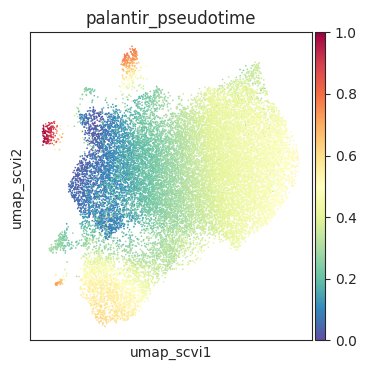

In [21]:
#pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]
palantir_pseudotime = []
for c in adata.obs_names:
    palantir_pseudotime.append(pr_res.pseudotime[c])
adata.obs['palantir_pseudotime'] = palantir_pseudotime
sc.pl.embedding(adata, basis='umap_scvi', color='palantir_pseudotime')

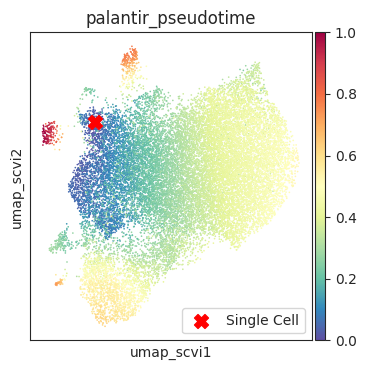

In [22]:
sc.pl.embedding(adata, basis='umap_scvi', color=['palantir_pseudotime'], show=False)
single_cell_umap_coords = list(adata.obsm['X_umap_scvi'][start_cell_id])  # Replace x and y with actual UMAP coordinates
plt.scatter(single_cell_umap_coords[0], single_cell_umap_coords[1], color='red', marker='X', s=100, label='Single Cell')
plt.legend()
plt.show()

In [23]:
np.where(adata.obs.palantir_pseudotime ==  np.min(adata.obs.palantir_pseudotime)) 

(array([10848]),)

In [24]:
adata[ start_cell] .obs.level_3_annot

index
CGTTAGATCCTTTACA-HT-188-Adult-Duo-0    Epithelial_stem
Name: level_3_annot, dtype: category
Categories (1, object): ['Epithelial_stem']

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


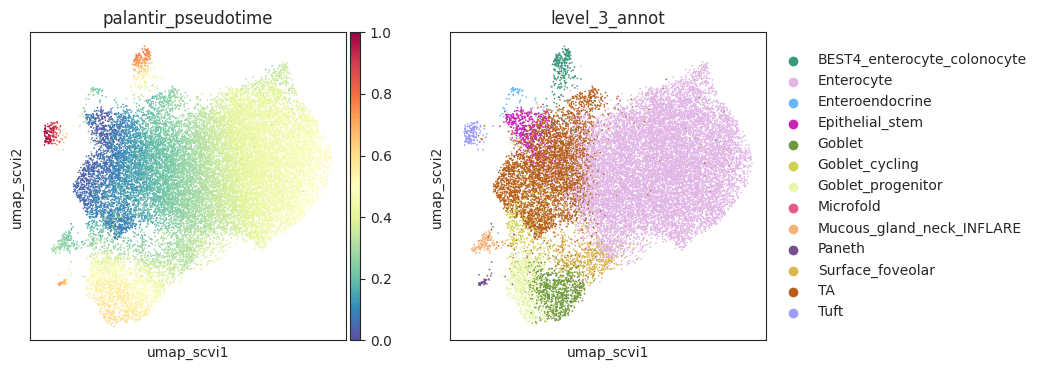

In [25]:
sc.pl.embedding(adata, basis='umap_scvi', color=['palantir_pseudotime','level_3_annot'])

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


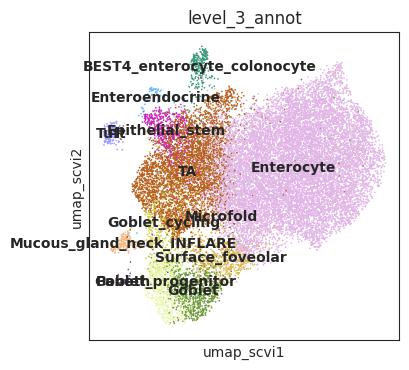

In [26]:
sc.pl.embedding(adata, basis='umap_scvi', color=['level_3_annot'], legend_loc='on data')

In [27]:
adata_temp = adata.copy()
adata_temp.obsm['X_umap'] = adata_temp.obsm['X_umap_scvi']

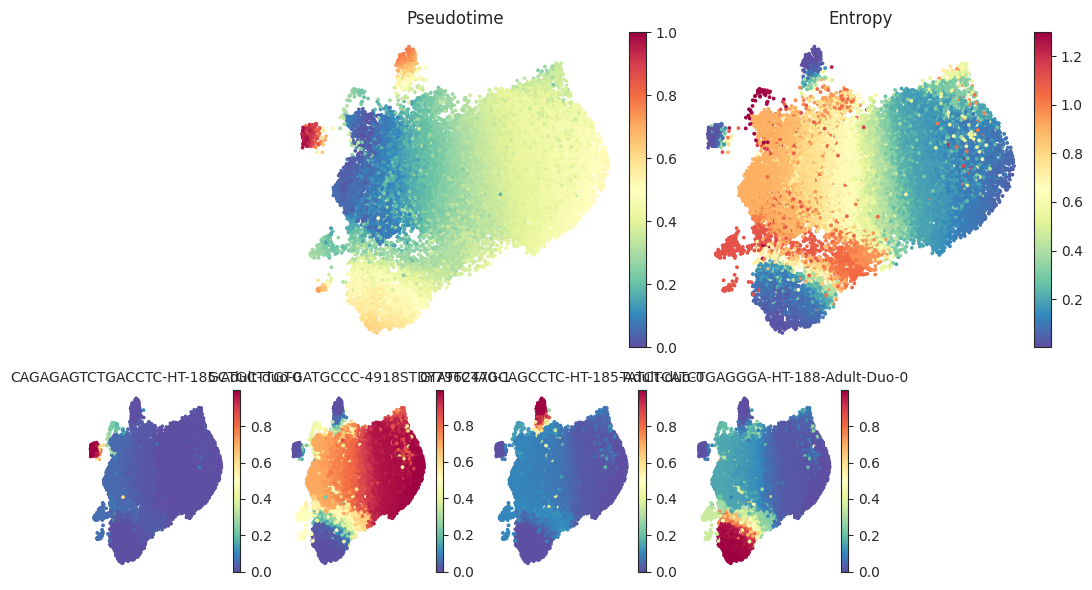

In [28]:
palantir.plot.plot_palantir_results(adata_temp, pr_res, s=3)
plt.show()

In [29]:
start_cell

'CGTTAGATCCTTTACA-HT-188-Adult-Duo-0'

In [30]:
start_cell_id

10848

In [31]:
adata.obs['root'] = list(adata.obs_names == start_cell) 

In [32]:
adata.obs['root'][~ np.asarray(adata.obs_names == start_cell)] = np.nan
adata.obs['root'] = adata.obs['root'].astype('category') 

/tmp/ipykernel_15581/1571100155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['root'][~ np.asarray(adata.obs_names == start_cell)] = np.nan


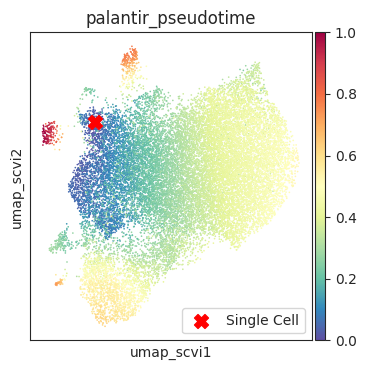

In [33]:
sc.pl.embedding(adata, basis='umap_scvi', color=['palantir_pseudotime'], show=False)
single_cell_umap_coords = list(adata.obsm['X_umap_scvi'][start_cell_id])  # Replace x and y with actual UMAP coordinates
plt.scatter(single_cell_umap_coords[0], single_cell_umap_coords[1], color='red', marker='X', s=100, label='Single Cell')
plt.legend()
plt.show()

In [34]:
list(adata.obsm['X_umap_scvi'][start_cell_id]) 

[4.1855106, 6.1353803]

/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


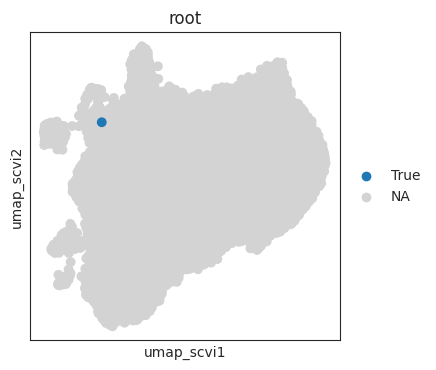

In [35]:
sc.pl.embedding(adata, basis='umap_scvi', color=['root'],s = 200)

In [36]:
pr_res.branch_probs.columns

Index(['CAGAGAGTCTGACCTC-HT-185-Adult-duo-0',
       'GCTGCTTGTGATGCCC-4918STDY7962470-1',
       'GTATTCTAGCAGCCTC-HT-185-Adult-duo-0',
       'TATCTCATCTGAGGGA-HT-188-Adult-Duo-0'],
      dtype='object')

In [37]:
pr_res.branch_probs

,CAGAGAGTCTGACCTC-HT-185-Adult-duo-0,GCTGCTTGTGATGCCC-4918STDY7962470-1,GTATTCTAGCAGCCTC-HT-185-Adult-duo-0,TATCTCATCTGAGGGA-HT-188-Adult-Duo-0
index,,,,
ACTGCTCAGTCCAGGA-HCA_A_GT12934998-0,0.045846,0.708173,0.094855,0.151125
CGAGCCACAGTCTTCC-HCA_A_GT12934998-0,0.048579,0.702738,0.096147,0.152535
AACACGTCAAGTCTAC-Pan_T7917827-0,0.000000,0.924978,0.035200,0.033996
AACTCAGTCTGTGCAA-Pan_T7917827-0,0.012914,0.811922,0.072539,0.102625
AACTCTTCAGGAATCG-Pan_T7917827-0,0.000000,0.966305,0.014859,0.015363
...,...,...,...,...
GCTGGGTTCAAAGTAG-GSM3972030-1,0.018372,0.778542,0.080048,0.123038
GTATCTTAGCCAGGAT-GSM3972030-1,0.000000,0.958607,0.018636,0.018826
GTCGTAAAGACTCGGA-GSM3972030-1,0.000000,0.012251,0.000000,0.984317


/tmp/ipykernel_15581/590187131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['terminals'][~np.in1d(adata.obs_names, ['CAGAGAGTCTGACCTC-HT-185-Adult-duo-0',
/opt/conda/envs/palantir_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


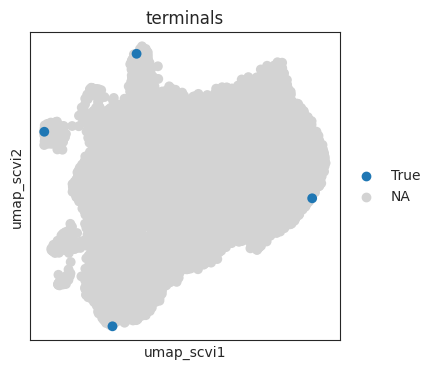

In [38]:
adata.obs['terminals'] = np.in1d(adata.obs_names, ['CAGAGAGTCTGACCTC-HT-185-Adult-duo-0',
       'GCTGCTTGTGATGCCC-4918STDY7962470-1',
       'GTATTCTAGCAGCCTC-HT-185-Adult-duo-0',
       'TATCTCATCTGAGGGA-HT-188-Adult-Duo-0'])
adata.obs['terminals'][~np.in1d(adata.obs_names, ['CAGAGAGTCTGACCTC-HT-185-Adult-duo-0',
       'GCTGCTTGTGATGCCC-4918STDY7962470-1',
       'GTATTCTAGCAGCCTC-HT-185-Adult-duo-0',
       'TATCTCATCTGAGGGA-HT-188-Adult-Duo-0'])] = np.nan
adata.obs['terminals'] = adata.obs['terminals'].astype('category') 
sc.pl.embedding(adata, basis='umap_scvi', color=['terminals'],s = 200)

In [39]:
pr_res.branch_probs

,CAGAGAGTCTGACCTC-HT-185-Adult-duo-0,GCTGCTTGTGATGCCC-4918STDY7962470-1,GTATTCTAGCAGCCTC-HT-185-Adult-duo-0,TATCTCATCTGAGGGA-HT-188-Adult-Duo-0
index,,,,
ACTGCTCAGTCCAGGA-HCA_A_GT12934998-0,0.045846,0.708173,0.094855,0.151125
CGAGCCACAGTCTTCC-HCA_A_GT12934998-0,0.048579,0.702738,0.096147,0.152535
AACACGTCAAGTCTAC-Pan_T7917827-0,0.000000,0.924978,0.035200,0.033996
AACTCAGTCTGTGCAA-Pan_T7917827-0,0.012914,0.811922,0.072539,0.102625
AACTCTTCAGGAATCG-Pan_T7917827-0,0.000000,0.966305,0.014859,0.015363
...,...,...,...,...
GCTGGGTTCAAAGTAG-GSM3972030-1,0.018372,0.778542,0.080048,0.123038
GTATCTTAGCCAGGAT-GSM3972030-1,0.000000,0.958607,0.018636,0.018826
GTCGTAAAGACTCGGA-GSM3972030-1,0.000000,0.012251,0.000000,0.984317


In [40]:
pr_res.branch_probs.columns

Index(['CAGAGAGTCTGACCTC-HT-185-Adult-duo-0',
       'GCTGCTTGTGATGCCC-4918STDY7962470-1',
       'GTATTCTAGCAGCCTC-HT-185-Adult-duo-0',
       'TATCTCATCTGAGGGA-HT-188-Adult-Duo-0'],
      dtype='object')

In [41]:
temp = [] 
for x in pr_res.branch_probs.columns:
    temp.append(adata[adata.obs_names == x].obs.level_3_annot)
pd.Series(temp)

0    index
CAGAGAGTCTGACCTC-HT-185-Adult-duo-0    T...
1    index
GCTGCTTGTGATGCCC-4918STDY7962470-1    En...
2    index
GTATTCTAGCAGCCTC-HT-185-Adult-duo-0    B...
3    index
TATCTCATCTGAGGGA-HT-188-Adult-Duo-0    G...
dtype: object

In [43]:
temp

[index
 CAGAGAGTCTGACCTC-HT-185-Adult-duo-0    Tuft
 Name: level_3_annot, dtype: category
 Categories (1, object): ['Tuft'],
 index
 GCTGCTTGTGATGCCC-4918STDY7962470-1    Enterocyte
 Name: level_3_annot, dtype: category
 Categories (1, object): ['Enterocyte'],
 index
 GTATTCTAGCAGCCTC-HT-185-Adult-duo-0    BEST4_enterocyte_colonocyte
 Name: level_3_annot, dtype: category
 Categories (1, object): ['BEST4_enterocyte_colonocyte'],
 index
 TATCTCATCTGAGGGA-HT-188-Adult-Duo-0    Goblet_progenitor
 Name: level_3_annot, dtype: category
 Categories (1, object): ['Goblet_progenitor']]

In [44]:
adata

AnnData object with n_obs × n_vars = 20765 × 23760
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [45]:
adata_original.obs['Palantir_pseudotime'] = adata.obs.palantir_pseudotime

In [46]:
adata_original.obs.to_csv('meta_subset_duo_healthy_ileum_disease.csv')

In [47]:
del adata_original.obs

In [48]:
adata_original.write_h5ad('duo_healthy_ileum_disease.h5ad')